In [44]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [45]:
adv_dataset=pd.read_csv('advertising.csv')

In [46]:
adv_dataset

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [47]:
adv_dataset.shape

(200, 4)

In [48]:
adv_dataset.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [49]:
adv_dataset.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [50]:
adv_dataset.duplicated().sum()

0

* Sales’ is the target variable that needs to be predicted. Now, based on this data, our objective is to create a predictive model, that predicts sales based on the money spent on different platforms for marketing

In [51]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

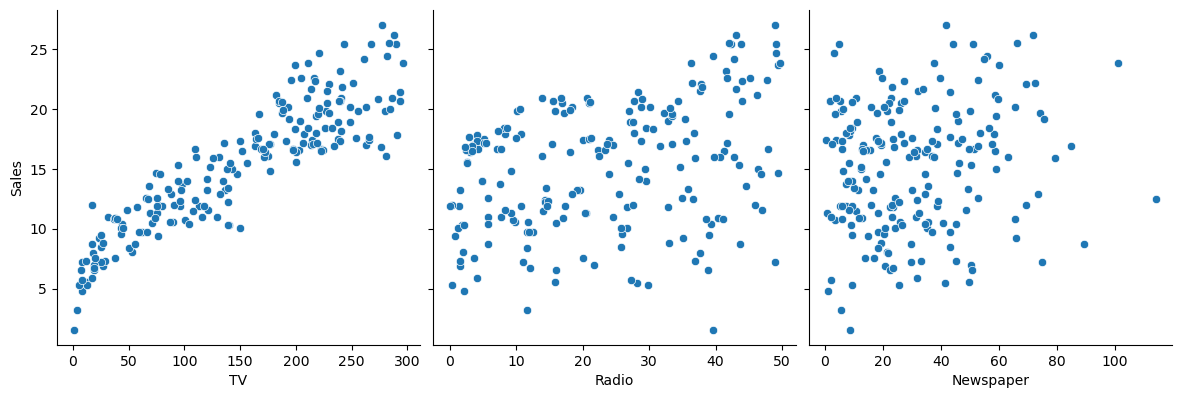

In [52]:
sns.pairplot(adv_dataset,x_vars=['TV','Radio','Newspaper'],y_vars='Sales',size=4,kind='scatter')
plt.show()

In [53]:
adv_dataset.corr()


,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


* From the scatterplot and the heatmap, we can observe that ‘Sales’ and ‘TV’ have a higher correlation as compared to others because it shows a linear pattern in the scatterplot as well as giving 0.9 correlation.means sales is highly dependant on TV .here we are going to do simple linear regression where there will be only one dependant(sales) and one independant variable(TV) 

<Axes: >

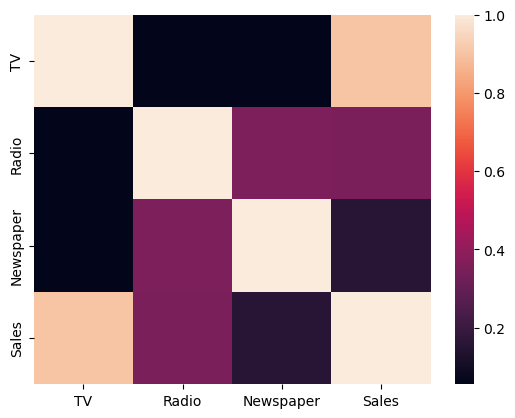

In [54]:
sns.heatmap(adv_dataset.corr())

In [55]:
x=adv_dataset['TV']
y=adv_dataset['Sales']

#### Applying Simple Linear Regression

In [56]:
from sklearn.model_selection import train_test_split
x_T,x_t,y_T,y_t=train_test_split(x,y,test_size=0.30)

* importing statmodels library to perform linear regression

In [57]:
import statsmodels.api as sm

* By default, the statsmodels library fits a line on the dataset which passes through the origin. But in order to have an intercept, you need to manually use the add_constant attribute of statsmodels. And once you’ve added the constant to your X_train dataset, you can go ahead and fit a regression line using the OLS (Ordinary Least Squares) the attribute of statsmodels as shown below


In [58]:
x_T_sm=sm.add_constant(x_T)#add constant to get an intercept
lr=sm.OLS(y_T,x_T_sm).fit()#fit regression line using OLS
lr.params #intercept and slope of regression line

const    6.795124
TV       0.056206
dtype: float64

In [59]:
lr.summary() #performing summary for other parameters

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     602.0
Date:                Tue, 10 Oct 2023   Prob (F-statistic):           3.53e-52
Time:                        12:45:59   Log-Likelihood:                -315.63
No. Observations:                 140   AIC:                             635.3
Df Residuals:                     138   BIC:                             641.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.7951      0.390     17.415      0.000       6.024       7.567
TV             0.0562      0.002     24.537      0.000       0.052       0.061
==============================================================================
Omnibus:                        1.235   Durbin-Watson:                   1.906
Prob(Omnibus):                  0.539   Jarque-Bera (JB):                1.061
Skew:                          -0.213   Prob(JB):                        0.588
Kurtosis:                       3.009   Cond. No.                         339.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
x_t_sm=sm.add_constant(x_t)
y_pred=lr.predict(x_t_sm)
y_pred.head()

125    11.696285
144    12.202139
114    11.190431
189     7.846176
48     19.565121
dtype: float64

In [63]:
from sklearn.metrics import mean_squared_error,r2_score
Rmse=np.sqrt(mean_squared_error(y_t,y_pred))
Rmse

2.23904479406871

In [64]:
r2=r2_score(y_t,y_pred)
r2

0.8073623683357312